In [1]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import torch

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential, load_model,model_from_json

from tensorflow.compat.v1.keras.backend import set_session 
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess=tf.compat.v1.Session(config=config)
set_session(sess)

In [4]:
from facial_analysis import FacialImageProcessing
imgProcessing=FacialImageProcessing(False)

In [5]:
import torch
use_cuda = torch.cuda.is_available()
print(use_cuda)
device = 'cuda' if use_cuda else 'cpu'

True


In [6]:
from hsemotions.facial_emotions import HSEmotionRecognizer
model_name='enet_b0_8_best_afew'
#model_name='enet_b0_8_best_vgaf'
#model_name='enet_b0_8_va_mtl'
#model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name,device=device)

C:\Users\avsavchenko\.hsemotions\enet_b0_8_best_afew.pt Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


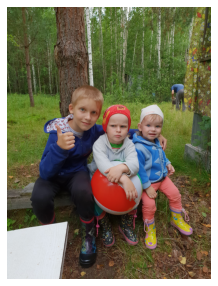

In [7]:
fpath='../test_images/20180720_174416.jpg'
frame_bgr=cv2.imread(fpath)
plt.figure(figsize=(5, 5))
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame)
bounding_boxes, points = imgProcessing.detect_faces(frame)
points = points.T

Happiness [-2.3742905   2.3464985  -0.9590913  -1.3544649   2.7177303   0.62425977
 -1.14482     0.06188819]
Anger [ 5.470049    0.05507286  1.8110021   1.5737613  -2.7276225   1.2486002
  2.1466556  -1.2970134 ]
Fear [-3.0138705  -0.90856695 -0.3850243   2.1815593   2.103635    0.17554098
 -0.07746454  1.7499694 ]


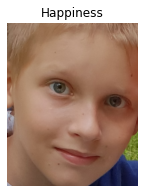

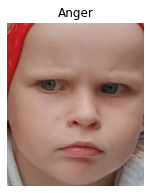

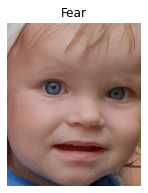

In [8]:
for bbox,p in zip(bounding_boxes, points):
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    emotion,scores=fer.predict_emotions(face_img,logits=True)
    print(emotion,scores)
    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)

In [9]:
features=fer.extract_features(face_img)
print(features.shape,features)

(1, 1280) [[ 0.00890796  0.11710107 -0.09941694 ... -0.1555572   0.06665332
  -0.12786515]]


['Happiness', 'Anger', 'Fear'] [[3.14692804e-03 3.53264004e-01 1.29568670e-02 8.72552488e-03
  5.12062728e-01 6.31161630e-02 1.07606659e-02 3.59671190e-02]
 [9.06899571e-01 4.03520279e-03 2.33590696e-02 1.84256621e-02
  2.49664008e-04 1.33109065e-02 3.26759405e-02 1.04390713e-03]
 [1.88412960e-03 1.54679446e-02 2.61098519e-02 3.39983404e-01
  3.14496100e-01 4.57356423e-02 3.55120674e-02 2.20810845e-01]]


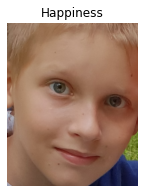

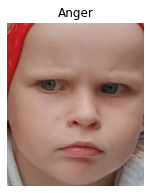

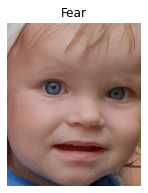

In [10]:
face_img_list=[]
for bbox,p in zip(bounding_boxes, points):
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    face_img_list.append(face_img)

emotions,scores=fer.predict_multi_emotions(face_img_list,logits=False)
print(emotions,scores)

for face_img,emotion in zip(face_img_list,emotions):    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)

In [11]:
features=fer.extract_multi_features(face_img_list)
print(features.shape,features)

(3, 1280) [[-0.21022364  0.02523678 -0.09702238 ... -0.08824905  0.13534285
   0.07660374]
 [ 0.07136124 -0.09608775 -0.07936884 ...  0.05676864 -0.19213265
  -0.00327081]
 [ 0.00890796  0.11710107 -0.09941694 ... -0.1555572   0.06665332
  -0.12786515]]


In [12]:
imgProcessing.close()